In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [6]:
class Board(object):
    """
    The environment for the reinforcement learning project.
    
    It should:
        - Have a matrix of size = NxN (which is basically N rows and N columns where N is a positive integer, greater than 0)
            - I have taken N as 3, but that is not necessary.
        - Initialize the matrix with zeroes.
            - The values in the matrix will be represented by integers: 0, 1, 2.
                - 0: empty cell represented by ' '.
                - 1: cell occupied by symbol 'O'.
                - 2: cell occupied by symbol 'X'.
            - 'X' or 'O' can be chosen by the player at initialization step by providing a choice in `player_sym`, defaults to 'x'
            - The other symbol will be chosen for the bot.
        - Have a property of winner, initialized by None.
        - Have a method to reset the board.
        - Have a method to represent the board in a human friendly form using 'X', 'O' and ' ' instead of the respective integers 2, 1, and 0.
        - Have a method which lets a user play by plotting a symbol of 'X' or 'O' only! anywhere within the matrix.
        - Calculates if there is a winner after each symbol is plotted. 
            - A win is defined by any row, column or diagonal being filled with the same symbol, with the symbol as the winner.
        - If there is a winner, prints a message for the same.
    """
    def __init__(self, n=3, player_sym='x'):
        """
        Constructor of the Board class, creates board objects.
        
        - n(default=3) int: The number of rows and columns in the tic-tac-toe board.
        - player_sym(default='x') str: The symbol chosen by a human player.
        """
        self.board = None
        self.reset_board(n)
        self.stale = False
        # Initalize the board

        self.sym_o = {
            'mark': 'O',
            'value': 1
        }
        # Setup the 'O' symbol

        self.sym_x = {
            'mark': 'X',
            'value': 2
        }
        # Setup the 'X' symbol

        self.sym_empty = {
            'mark': ' ',
            'value': 0
        }
        # Setup the default ' ' Symbol

        self.player_sym, self.bot_sym = (self.sym_x, self.sym_o) \
                                        if player_sym.lower() == 'x' \
                                        else (self.sym_o, self.sym_x)
        # Ensure different symbols are assigned to the bot and the player.

        self.winner = None
        # Initialize the winner as None

    def reset_board(self, n=3):
        """
        params:
        
        - n(default=3): int: The number of rows and columns in the tic-tac-toe board.
        Clear the board when the game is to be restarted or a new game has to be started.
        """
        self.board = np.zeros((n, n)).astype(int)
        self.winner = None
        
    def draw_char_for_item(self, item):
        """
        Returns the string mapping of the integers in the matrix 
        which can be understood by, but is not equal to: 
        {
            0: ' ',
            1: 'O',
            2: 'X'
        }
        (The exact mapping is present in the constructor)
        
        params:
        
        - item int: One of (1, 2, 0) representing the mark of the player, bot or empty.
        return: str
        """
        if item == self.sym_x.get('value'):
            # If item = 2 (value of symbol x, return mark of symbol x viz: 'X')
            return self.sym_x.get('mark')
        elif item == self.sym_o.get('value'):
            # If item = 1 (value of symbol o, return mark of symbol o viz: 'O')
            return self.sym_o.get('mark')
        else:
            # Otherwise the cell must be empty, as only 1, 2 have 'O','X' mapped onto them.
            return self.sym_empty.get('mark')

    def draw_board(self):
        """
        Prints a human friendly representation of the tic-tac-toe board
        """
        elements_in_board = self.board.size
        # Calculate the elements in the board

        items = [
            self.draw_char_for_item(self.board.item(item_idx)) 
            for item_idx in range(elements_in_board)
        ]
        # For each integer cell/element in the matrix, find the character mapped to it
        # and store in a list.
        board = """
             {} | {} | {}
            -----------
             {} | {} | {}
            -----------
             {} | {} | {}
        """.format(*items)
        # The *items expand to N arguments where N is the number of elements in `items`,
        # which is equal to the number of elements in the matrix, hence the string equivalent 
        # of the board
        print(board)
        
    def have_same_val(self, axis, item, item_x, item_y):
        """
        Oh boy! without the documentation this would be just 12-14 lines of code.
        
        Checks if a row(if axis = 0) of the board matrix has same values throughout.
                                    or
        Checks if a column(if axis = 1) of the board matrix has same values throughout.
        
        This is useful to check if a row or column is filled up by the symbol which was added the latest.
        
        params:
        
        - axis int: The direction along which operations are to be performed. Can have a value of 0 or 1 only.
            - 0 means row
            - 1 means column
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        max_limit, _ = self.board.shape
        # Get the number of rows in the board.

        result = True
        # Optimistic approach, assume the result to be true, 
        # unless proven wrong in the further steps.
        
        row_idx = col_idx = 0
        # set row_idx and col_idx iteration variables as 0
        # they don't get used much, they are present for code readability.

        main_idx, fixed_idx, ignore_idx = (col_idx, item_x, item_y) \
                                            if axis == 0 \
                                            else (row_idx, item_y, item_x)
        # main_idx: Update this index each iteration of the loop.
        # fixed_idx: Don't modify this index ever.
        # ignore_idx: this is the index of the inserted element 
        #              which doesn't need to be evaluated, so ignore.
        # The if-else ensures weather to increment the row index 
        # or the column index according to the value of the axis.
        
        while main_idx < max_limit:
            # If the main_idx which starts at 0 is less than number of rows/cols in matrix.
            if main_idx != ignore_idx:
                # And main_idx is not equal to the index of the latest item inserted (ignore_idx)
                # because for a fixed_index if we compare main_idx and ignore_idx it would give us the 
                # latest element added, which will be equal to itself.
                # Learning algorithms are costly, ain't nobady got time fo that!

                board_item = self.board[fixed_idx][main_idx] \
                    if axis == 0 \
                    else self.board[main_idx][fixed_idx]
                # find the item(board_item) in the matrix 
                # corresponding to main_idx and the fixed_index.
                # It should be an element in the same row or column depending on the axis.
                
                if board_item != item or board_item == 0:
                    # If the board_item found is not equal to the latest item added
                    # or if the board item is 0, which is still not marked by bot or player,
                    # result is false as the function didn't find all 
                    # values to be same across the row, or column.
                    # and exit the loop because a single-mismatch is sufficient 
                    # to confirm that all elements are not same.
                    result = False
                    break
            main_idx += 1
        return result
    
    def left_diagonal_has_same_values(self, item, item_x, item_y):
        """
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        i = j = 0
        # set i, j to 0
        
        result = True
        # Optimistic approach, assume the result to be true, 
        # unless proven wrong in the further steps.
        
        max_limit, _ = self.board.shape
        # Get the number of rows in the board.
        
        while i < max_limit:
            # The row index i is sufficient as i and j are incremented 
            # by same factor resulting in same values (Either would do)
            if i != item_x:
                # Avoid checking for the latest item added as that's what we are comparing with
                if self.board[i][j] != item or self.board[i][j] == 0:
                    # If the board_item found is not equal to the latest item added
                    # result is false as the function didn't find all 
                    # values to be same across the row, or column.
                    # and exit the loop because a single-mismatch is sufficient 
                    # to confirm that all elements are not same.
                    result = False
                    break
            i += 1
            j += 1
        return result

    def right_diagonal_has_same_values(self, item, item_x, item_y):
        """
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        result = True
        max_limit, _ = self.board.shape
        i = 0
        j = max_limit - 1
        while i < max_limit:
            # The row index i is sufficient as i and j are incremented 
            # by same factor resulting in same values (Either would do)
            if i != item_x:
                # Avoid checking for the latest item added as that's what we are comparing with
                if self.board[i][j] != item or self.board[i][j] == 0:
                    # If the board_item found is not equal to the latest item added
                    # result is false as the function didn't find all 
                    # values to be same across the row, or column.
                    # and exit the loop because a single-mismatch is sufficient 
                    # to confirm that all elements are not same.
                    result = False
                    break
            i += 1
            j -= 1
        return result

    def cols_have_same_values(self, item, item_x, item_y):
        """
        Check if any of the columns have same values
        
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        axis = 1
        return self.have_same_val(axis, item, item_x, item_y)

    def rows_have_same_values(self, item, item_x, item_y):
        """
        Check if any of the rows have same values
        
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        axis = 0
        return self.have_same_val(axis, item, item_x, item_y)
    
    def element_diagonal_has_same_value(self, item, item_x, item_y):
        """
        Check if any of the diagonals have same values
        
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        max_limit, _ = self.board.shape
        if item_x == item_y and item_x + item_y == max_limit - 1:
            return self.left_diagonal_has_same_values(item, item_x, item_y) or \
            self.right_diagonal_has_same_values(item, item_x, item_y)
        
        if item_x == item_y:
            # elements on the left diagonal have same row and column value.
            return self.left_diagonal_has_same_values(item, item_x, item_y)

        if item_x + item_y == max_limit - 1:
            # elements on the right diagonal have sum of the row and column value as the same number.
            return self.right_diagonal_has_same_values(item, item_x, item_y)
        # Else, it is not either of the diagonals
        return False
    
    def is_game_over(self, player, item, item_x, item_y):
        """
        Check if the game is over, which is defined by a row, column or diagonal having 
        the same values as the latest inserted integer `item`.
        
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        return self.cols_have_same_values(item, item_x, item_y) or \
                    self.rows_have_same_values(item, item_x, item_y) or \
                    self.element_diagonal_has_same_value(item, item_x, item_y)

    def is_winning_move(self, player, item, item_x, item_y):
        """
        Check if the last move was a winning move, which is defined by a row, column or diagonal having 
        the same values as the latest inserted integer `item`.
        
        params
        
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        - item int: The latest integer inserted into the matrix at row-index = item_x, and column-index = item_y. 
        """
        if self.is_game_over(player, item, item_x, item_y):
            self.winner = player
            return True
        return False
    
    def is_stale(self):
        """
        Checks if there is no vacant space on the board
        """
        x, y = np.where(self.board == 0)
        if len(x) == 0 and len(y) == 0:
            self.stale = True
        return self.stale
            
    
    def player_move(self, input_symbol, item_x, item_y):
        """
        The method which facilitates insertion of values into the board matrix.
        
        params:
        
        - input_symbol: 'X' or 'O'
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        """
        symbol = None
        
        if input_symbol == self.sym_o.get('mark'):
            # If 'O' was inserted
            symbol = self.sym_o
        
        elif input_symbol == self.sym_x.get('mark'):
            # If 'X' was inserted
            symbol = self.sym_x

        else:
            # invalid symbol
            return
        if self.board[item_x][item_y] == 0:
            self.board[item_x][item_y] = symbol.get('value')
            # insert the integer corresponding to the symbol in to the matrix.

            self.draw_board()
            # Show the board in a human friendly format for evaluation.

            if self.is_winning_move(symbol.get('mark'), symbol.get('value'), item_x, item_y):
                # If this move was a winning move, declare the symbol as the winner.
                print('Winner is: {}'.format(self.winner))
                return self.winner
            elif self.is_stale():
                print('Draw')
                return 'draw'
        
    def play(self, item_x, item_y):
        """
        The method exposed to a human user
        facilitates insertion of values into the board matrix.
        
        params:
        
        - input_symbol: 'X' or 'O'
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        """
        max_limit, _ = self.board.shape
        if item_x > max_limit - 1 or item_y > max_limit:
            # If the row, column values dont' exist in the board matrix. 
            # Exit without inserting it into the board.
            return
        self.player_move(self.player_sym.get('mark'), item_x, item_y)
        
    def bot_play(self, item_x, item_y):
        """
        The method exposed to a bot
        facilitates insertion of values into the board matrix.
        
        params:
        
        - input_symbol: 'X' or 'O'
        - item_x int: The row of the matrix in which item has been inserted.
        - item_y int: The column of the matrix in which the item has been inserted.
        """
        max_limit, _ = self.board.shape
        if item_x > max_limit - 1 or item_y > max_limit:
            return
        self.player_move(self.bot_sym.get('mark'), item_x, item_y)

In [7]:
class Agent(object):
    def __init__(self, exploration_rate=0.33, learning_rate=0.5, discount_factor=0.01):
        """
        An agent is a problem solver. 
        It should perform actions like:
            - plotting a symbol on the tic-tac-toe board if it is vacant.
            - Remember which states are more profitable than the others.
            - Explore better states
            - Exploit for maximum profit
        
        params:
        - exploration_rate: A floating point number < 1 
                which defines the agents probability to explore.
        - learning_rate: Used for assessing the value of intermediate 
                states during temporal difference learning.
        - discount_factor: The factor by which a reward must be reduced 
                to be passed on for intermediate states
        """
        self.states = {}
        # The list of states, a linear representation of the 3x3 tic tac toe board
        self.state_order = []
        # The order in which the agent progressed through states to be able to 
        # assign discounted rewards to older states.
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate

    @staticmethod
    def serialize_board(board):
        """
        convert the matrix 
        
            [
                [1, 2, 3],
                [4, 5, 6],
                [7, 8, 9],
            ]
            
            to the form: "123456789" i.e. flatten and stringify
        """
        serialized_board = board.flatten()
        return ''.join([str(i) for i in serialized_board.flatten().tolist()])

    def get_serious(self):
        """
        Quit exploring states and start exploiting
        Use this if you want to play with the agent.
        """
        self.exploration_rate = 0
    
    def learn_by_temporal_difference(self, reward, new_state_key, state_key):
        """
        Implementation of the temporal difference formula.
        https://en.wikipedia.org/wiki/Temporal_difference_learning
        https://detailed.af/reinforcement/
        """
        old_state = self.states.get(state_key, np.zeros((3,3)))
        return self.learning_rate * ((reward * self.states[new_state_key]) - old_state)

    def set_state(self, old_board, action):
        """
        Store the action performed for a given state
        """
        state_key = Agent.serialize_board(old_board)
        self.state_order.append((state_key, action))

    def on_reward(self, reward):
        """
        Assign rewards to actions performed on intermediate states.
        """
        if len(self.state_order) == 0:
            return None
        new_state_key, new_action = self.state_order.pop()
        # get the latest state and the action performed that led to the reward

        self.states[new_state_key] = np.zeros((3,3))
        # initialize the value with a zero matrix

        self.states[new_state_key].itemset(new_action, reward)
        # Assign the reward to this state
        
        while self.state_order:
            # while there is a stack of states (that were caused by actions performed)

            state_key, action = self.state_order.pop()
            # get the state and action performed on it
            
            reward *= self.discount_factor
            # Reduce the original reward (self.discount_factor is a number < 1)
            
            # Implementation of the value function
            if state_key in self.states:
                reward += self.learn_by_temporal_difference(reward, new_state_key, state_key).item(new_action)
                # If this state was encountered due to a different experiment, increase its previous value
                self.states[state_key].itemset(action, reward)
            else:
                self.states[state_key] = np.zeros((3,3))
                reward = self.learn_by_temporal_difference(reward, new_state_key, state_key).item(new_action)
                self.states[state_key].itemset(action, reward)
                # If this state was not encountered before, assign it the discounted reward as its value                
            new_state_key = state_key
            new_action = action
            
    def select_move(self, board):
        """
        Choose from exploration and exploitation.
        Epsilon greedy implementation for policy.
        http://home.deib.polimi.it/restelli/MyWebSite/pdf/rl5.pdf
        http://tokic.com/www/tokicm/publikationen/papers/AdaptiveEpsilonGreedyExploration.pdf
        """
        state_key = Agent.serialize_board(board)
        exploration = np.random.random() < self.exploration_rate
        print('explore' if exploration or state_key not in self.states else 'exploit')
        action = self.explore_board(board) \
                    if exploration or state_key not in self.states \
                    else self.exploit_board(state_key)
        print(action)
        self.set_state(board, action)
        return action

    def explore_board(self, board):
        """
        Find an empty cell from the board
        """
        zero_x, zero_y = np.where(board == 0)
        vacant_cells = [(x, y) for x, y in zip(zero_x, zero_y)]
        randomly_selected_vacant_cell = np.random.choice(len(vacant_cells))
        return vacant_cells[randomly_selected_vacant_cell]
        
    def exploit_board(self, state_key):
        """
        Find the best action for the given state
        """
        state_values = self.states[state_key]
        # For the current state get the matrix of accumulated rewards
        print('State rewards')
        print(state_values)
        
        best_actions_x, best_actions_y = np.where(state_values == state_values.max())
        # Find the coordinates which correspond to highest reward
        
        best_value_indices = [(x, y) for x,y in zip(best_actions_x, best_actions_y)]
        select_index = np.random.choice(len(best_value_indices))
        return best_value_indices[select_index]

In [8]:
bot1_sym = 'O'
bot2_sym = 'X'

def optimize_bot(game, bot1, bot2):
    """
    Punish or Reward the bot with respect to the agent that wins the game
    """
    if game.winner == bot1_sym:
        bot1.on_reward(1)
        # reward
        bot2.on_reward(-1)
        # punishment
    elif game.winner == bot2_sym:
        bot1.on_reward(-1)
        bot2.on_reward(1) 
    
def train(epochs, bot1, bot2):
    bot1_wins = 0
    bot2_wins = 0
    win_trace = pd.DataFrame(data=np.zeros((epochs, 2)), columns=['bot1', 'bot2'])
    for i in range(epochs):
        print('-' * 100)
        print('epoch: {}'.format(i + 1))
        game = Board()
        while not game.stale:
            # Exit if the board is full
            
            winner = game.player_move(bot2_sym, *bot2.select_move(game.board))
            if winner:
                optimize_bot(game, bot1, bot2)
                bot2_wins += 1
                win_trace.set_value(i, 'bot2', 1)
                break
                win_trace[i] = 2
            elif winner == 'draw':
                break
    return win_trace, bot1_wins, bot2_wins

In [9]:
bot = Agent()
bot2 = Agent()
epochs = 5000
win_trace, bot1_wins, bot2_wins = train(epochs, bot, bot2)

----------------------------------------------------------------------------------------------------
epoch: 1
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 1)

             X |   | X
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 1)

             X |   | X
            -----------
               | X |  
            -----------
               | X |  
        
explore
(2, 2)

             X |   | X
            -----------
               | X |  
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2
explore
(2, 2)

               |   |  
            ------

C:\Users\kamisch\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


[[0.00000000e+00 0.00000000e+00 1.50000000e-02]
 [1.14193828e-12 5.01262563e-07 0.00000000e+00]
 [0.00000000e+00 3.05175781e-35 0.00000000e+00]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 43
exploit
State rewards
[[ 1.25000008e-13  1.25632078e-17  7.52841123e-11]
 [ 0.00000000e+00  1.25000004e-11 -7.42288225e-05]
 [ 7.81250000e-19  1.14211086e-16  1.51124962e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0.00000000e+00 0.00000000e+00 1.50000000e-02]
 [1.14193828e-12 5.01262

 [0.    0.    0.   ]]
(0, 1)

             X | X |  
            -----------
               | X | X
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

             X | X |  
            -----------
               | X | X
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 66
exploit
State rewards
[[ 1.25000008e-13 -7.55670168e-09  7.52841123e-11]
 [ 5.01256313e-07  1.25000004e-11 -7.47158532e-07]
 [-7.55436079e-05 -7.55623300e-05 -7.40511358e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  5.012500e-05 -3.673875e-03]
 [ 0.000000e+00  0.000000e+00  0.000000e+00]]
(1, 1)

               |   |  
            -----------
    


               |   | X
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
             X |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 89
exploit
State rewards
[[ 1.51514248e-06 -7.55670168e-09  1.51514254e-06]
 [-2.37406803e-07  2.48742106e-07 -7.40565319e-07]
 [-7.55436079e-05 -7.55623300e-05  3.77962787e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0.00000000e+00 7.55682097e-07 0.00000000e+00]
 [1.25000008e-09 0.00000000e+00 1.

explore
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               | X | X
        
explore
(0, 1)

               | X |  
            -----------
             X |   | X
            -----------
               | X | X
        
explore
(1, 1)

               | X |  
            -----------
             X | X | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 113
exploit
State rewards
[[-9.27327009e-07  1.50913978e-04  1.88920042e-08]
 [-2.37406803e-07  2.48742106e-07  7.51057247e-05]
 [-7.55436079e-05 -7.55623300e-05  3.77812151e-05]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  7.50000000e-03 -7.55515208e-07]
 [ 0.00000000e+

explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(2, 2)

               |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[1.14193828e-10 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.00015112 0.        ]]
(2, 1)

             X |   |  
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.    0.015]
 [0.    0.    0.   ]]
(1, 2)

             X |   |  
            -----------
         

(2, 1)

               |   | X
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.015]]
(2, 2)

               |   | X
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
             X |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 159
exploit
State rewards
[[ 5.66758875e-09 -1.88866789e-05  1.88920042e-08]
 [ 5.66765126e-09 -2.72279238e-05 -2.59129263e-07]
 [-2.63817767e-07 -9.33350204e-09 -1.11763716e-07]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 1)

  

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 182
exploit
State rewards
[[ 7.20183239e-07 -2.39012275e-09  1.51126195e-04]
 [-2.23898621e-09 -1.11553695e-06 -7.51938597e-05]
 [ 1.56724605e-06 -9.33350204e-09 -1.11763716e-07]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 1)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 183
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -------

        
explore
(2, 1)

               |   |  
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0.00000e+00 0.00000e+00 1.51125e-04]
 [0.00000e+00 0.00000e+00 5.01250e-05]
 [0.00000e+00 0.00000e+00 0.00000e+00]]
(0, 2)

               |   | X
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0.    0.015 0.   ]
 [0.    0.015 1.   ]
 [0.    0.    0.   ]]
(1, 2)

               |   | X
            -----------
             X |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 207
exploit
State rewards
[[-7.76066171e-07 -3.61134947e-05  1.30855585e-09]
 [-1.85232000e-07 -1.11553695e-06 -7.51938597e-05]
 [ 1.13462123e-06 -9.33350204e-09  4.00640422e-07]]
(2, 0)

               |   |  
            -----------

(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.50000000e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25000008e-09 0.00000000e+00]]
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 231
exploit
State rewards
[[-2.84358743e-07 -1.62646284e-07  1.80940768e-07]
 [-1.85232000e-07  1.04477343e-06 -6.40408338e-07]
 [ 9.33181523e-07  3.35317822e-07  4.00640422e-07]]
(1, 1)

               |   |  
            -----------
               |

        
explore
(2, 0)

               | X |  
            -----------
               | X |  
            -----------
             X |   | X
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.005 0.    0.   ]
 [0.    0.    0.   ]]
(1, 0)

               | X |  
            -----------
             X | X |  
            -----------
             X |   | X
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X |  
            -----------
             X | X |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 254
exploit
State rewards
[[-1.56323689e-07 -1.62646284e-07  1.80940768e-07]
 [-7.42099659e-05  3.65619653e-05 -6.40408338e-07]
 [ 1.08147446e-07  1.83156836e-06 -3.63511343e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
e

(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 275
exploit
State rewards
[[-1.56323689e-07 -9.00670528e-07 -2.27335476e-08]
 [-7.42099659e-05  1.52748957e-06 -6.40408338e-07]
 [ 4.12065559e-06 -7.84950038e-07  5.05132214e-06]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[-0.00750037  0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.015       0.        ]]
(2, 1)

               |   |  
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State r

        
exploit
State rewards
[[-5.51605108e-05 -3.77812489e-05  1.93918870e-05]
 [-3.71165625e-03  2.00682593e-03  7.55625000e-05]
 [ 0.00000000e+00  2.90916196e-05 -4.56384648e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0.00000000e+00 5.01250000e-05 0.00000000e+00]
 [1.49874687e-02 0.00000000e+00 2.50625000e-05]
 [0.00000000e+00 1.25000008e-09 0.00000000e+00]]
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
             X |   |  
        
explore
(0, 0)

             X |   |  
            -----------
             X | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 298
exploit
State rewards
[[-8.67723755e-06  4.07588672e-07 -8.66971727e-06]
 [-7.42099659e-05 -5.47383074e-07  1.903


               |   | X
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.00015112]]
(2, 2)

               |   | X
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
             X |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 321
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 1)

               |   | X
            -----------
               |   |  
            -----------
               | X |  
        
exploi

 [-9.15072498e-08  1.26891264e-08  5.34887876e-09]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(1, 1)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 7.528125e-05 1.500000e-02]]
(2, 2)

               |   |  
            -----------
               | X | X
            -----------
               |   | X
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
               | X | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 345
exploit
State rewards
[[ 1.76931607e-07 -6.34456309e-09  5.82758016e-08

epoch: 370
exploit
State rewards
[[ 6.08672158e-08  1.41011385e-04  5.82758016e-08]
 [-1.40242474e-08  9.48066889e-07 -1.95638468e-07]
 [-9.15072498e-08  9.40563681e-08 -3.65735193e-05]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.98806250e-03  0.00000000e+00  1.40059688e-02]
 [ 0.00000000e+00 -3.67387500e-03 -7.55515208e-07]
 [ 3.92871257e-07  1.14193828e-14  3.92871257e-07]]
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 371
exploit
State rewards
[[ 6.08672158e-08  1.41011385

exploit
State rewards
[[ 0.          0.          0.        ]
 [-0.00744987  0.015       0.        ]
 [ 0.          0.          0.0075    ]]
(1, 1)

             X | X |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

             X | X | X
            -----------
               | X |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 397
exploit
State rewards
[[ 1.51163652e-06 -5.44651703e-10 -7.60227999e-07]
 [ 1.98699534e-05  1.60087800e-04 -1.95638468e-07]
 [-9.15072498e-08  3.95227653e-07 -1.89187047e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X | X |  
            


               | X | X
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.015 0.    0.   ]]
(2, 0)

               | X | X
            -----------
             X |   | X
            -----------
             X |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
             X |   | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 418
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00 -7.39744023e-05  1.51135794e-06]
 [ 1.51136419e-06  0.00000000e+00  0.00000000e+00]
 [ 1.51135794e-06  1.51135794e-06  1.25000008e-11]]
(1, 0)

         

exploit
State rewards
[[-7.68197102e-06  1.09133099e-07 -3.20083562e-08]
 [ 1.51603334e-04  1.03041000e-06 -1.95638468e-07]
 [-3.62419955e-07  3.85609917e-06  1.61031103e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 441
exploit
State rewards
[[-7.68197102e-06  1.09133099e-07 -3.20083562e-08]
 [ 1.51603334e-

exploit
State rewards
[[-7.68197102e-06 -4.81095070e-07  1.51365548e-04]
 [-4.99508988e-07 -9.08590344e-07 -1.95638468e-07]
 [ 3.41128160e-07  1.00950189e-07 -7.93752848e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0.00000000e+00 1.50000000e-02 0.00000000e+00]
 [7.52841120e-09 1.49993739e-02 0.00000000e+00]
 [1.25221688e-06 1.50568947e-06 1.13918150e-07]]
(0, 1)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 1)

               | X | X
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
               | X |  
            -----------
               |   |  
        
Winner is: X
-----------------------------------------

epoch: 486
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-5.51605108e-05 -3.62698858e-05  1.93918870e-05]
 [-3.71165625e-03 -3.65205455e-05  2.28343460e-05]
 [ 0.00000000e+00  1.96463071e-05 -4.56384648e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
             X |   |  
        
exploit
State rewards
[[0.00000000e+00 1.12500063e-08 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.51136419e-06]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
             X |   | X
        
explore
(0, 1)

               | X |  
            -----------
               |   | X
            -----------
             X |   | X
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               | X | X
    

epoch: 511
exploit
State rewards
[[-1.24715399e-06 -4.81095070e-07  1.51572940e-04]
 [-7.57713564e-05 -9.08590344e-07 -1.21112959e-07]
 [-7.53032921e-05  1.56809964e-06 -7.93752848e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 1)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.     0.     0.   ]
 [ 0.    -0.485  0.   ]
 [ 0.     0.     0.   ]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 512
exploit
State rewards
[[-1.24715399e-06 -4.81095070e-07  1.51365548e-04]
 [-7.57713564e-05 -9.08590344e-07 -1.21112959e-07]
 [-7.53032921e-05  1.56809964e-06 -7.93752848e-05]]
(0, 2)


(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 1.50369324e-04  1.51135160e-06  7.55688395e-07]
 [-3.57462811e-05  1.49987279e-04  0.00000000e+00]
 [ 1.68998141e-04  1.51136419e-06  7.49971972e-03]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 535
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.98806250e-03  0.00000000e+00  1.31492857e-06]
 [-7.55677827e-07  1.50

State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 560
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 1)

               |   | X
            -----------
               |   | X
            -----------
               | X |  
        
exploit
State rewards
[[0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.125e-06 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00]]
(1, 1)

               |   | X
            -----------
               | X | X
            -----------
               | X |  
        
exploit


exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 586
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[-3.63386825e-03  9.66629499e-04 -1.93174769e-03]
 [ 9.67385210e-04 -3.48425462e-03  1.59658738e-02]
 [-2.39381275e-07 -7.77494844e-03  0.00000000e+00]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0.00000000e+00 1.51136419e-06 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
(0, 2)

               |   | X
            -----------
        

(2, 1)

             X |   | X
            -----------
               | X | X
            -----------
               | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

             X |   | X
            -----------
               | X | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 612
exploit
State rewards
[[-1.22864620e-06  9.94081533e-07  9.70678319e-07]
 [-3.60440700e-05 -5.64300244e-05  8.81274725e-07]
 [-1.26944452e-06  2.69344676e-07 -1.57966968e-05]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.50698050e-04  0.00000000e+00  1.31492857e-06]
 [-7.55677827e-07  8.53899911e-07  1.13138586e-06]
 [ 3.92871257e-07  1.14193828e-14  1.31492857e-06]]
(0, 0)

             X | X |  
            -----------
       

(0, 1)

               | X |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.51136419e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
(1, 2)

               | X |  
            -----------
             X |   | X
            -----------
               |   |  
        
explore
(0, 2)

               | X | X
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
             X |   | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 635
exploit
State rewards
[[-1.22864620e-06 -2.79742436e-06  9.70678319e-07]
 [ 1.41004742e-06 -7.23526689e-0

exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 660
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00 -1.48781220e-04 -7.43334670e-05]
 [-7.40565318e-07 -7.40565319e-07  0.00000000e+00]
 [-7.32187202e-05 -3.70201281e-07  1.25000008e-11]]
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.00000000e+00  7.55682097e-07  1.51125000e-04]
 [ 1.25000008e-09  0.00000000e+00  1.50358069e-04]
 [ 0.00000000e+00 -2.50540346e-05  0.00000000e+00]]
(0, 2)

             X |   | X
            -----------

State rewards
[[-2.94481543e-07  1.62424319e-06 -3.71683001e-05]
 [-4.92660761e-07 -7.23526689e-05  2.84303854e-07]
 [ 2.00408436e-06 -1.15719994e-07 -2.25757998e-07]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-5.51605108e-05 -8.69570025e-05 -9.82314105e-06]
 [-3.71165625e-03 -3.65205455e-05  1.73944232e-04]
 [ 0.00000000e+00  1.94603501e-04 -4.56384648e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[-7.32187202e-05  1.50000000e-02  0.00000000e+00]
 [-2.44687406e-05  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

           

(1, 2)

               | X | X
            -----------
             X |   | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 708
exploit
State rewards
[[ 2.00955143e-05  2.47006450e-07 -3.71683001e-05]
 [ 5.64600426e-05  9.41208938e-05  2.84303854e-07]
 [ 1.70772821e-06 -1.15719994e-07 -2.24260346e-07]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-7.32351614e-03  1.12482917e-02  7.52535886e-03]
 [-7.47312978e-03  0.00000000e+00 -2.43096592e-05]
 [ 1.49492823e-02  7.50341655e-03  1.86617581e-02]]
(2, 2)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
explore
(2, 1)

               |   |  
            -----------
               | X |  
            -----------
           

State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

             X |   | X
            -----------
             X |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 732
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 1)

             X |   |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.    0.015]
 [0.    0.    0.   ]]
(1, 2)

             X |   |  
            -----------
               |   | X
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.

exploit
State rewards
[[0.00000e+00 0.00000e+00 1.51125e-04]
 [0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 7.55625e-05 0.00000e+00]]
(0, 2)

               | X | X
            -----------
               |   | X
            -----------
             X |   |  
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.015 1.    0.   ]
 [0.    0.    0.   ]]
(1, 1)

               | X | X
            -----------
               | X | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 758
exploit
State rewards
[[-1.75877103e-05  2.47006450e-07  1.92720848e-05]
 [ 9.39050167e-06  1.12002550e-04 -1.80086273e-05]
 [-9.78074228e-07  1.95369317e-06 -9.58211440e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(0, 2)

               |   | X
            -----------
        

        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 785
exploit
State rewards
[[-1.75877103e-05  9.92097727e-06  6.67931204e-06]
 [ 9.39050167e-06 -3.44284665e-07  9.89800431e-05]
 [ 9.61895073e-07 -2.81022945e-06 -9.58211440e-06]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0.    0.    0.015]
 [0.    1.    0.   ]
 [0.    0.    0.   ]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
W


               |   |  
            -----------
             X | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 811
exploit
State rewards
[[-8.27047148e-08 -1.93704136e-07  7.39370120e-07]
 [ 2.00763152e-05 -3.44284665e-07 -5.69189817e-05]
 [ 9.61895073e-07 -2.81022945e-06 -9.58211440e-06]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.50747159e-04 -7.57304264e-05 -7.32160397e-07]
 [ 0.00000000e+00  1.98844034e-03  3.86180541e-05]
 [-3.67463068e-03  0.00000000e+00 -3.66712632e-05]]
(1, 1)

               |   |  
            -----------
             X

(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 2)

             X |   |  
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]
 [7.528125e-05 0.000000e+00 0.000000e+00]]
(2, 0)

             X |   |  
            -----------
               | X | X
            -----------
             X |   |  
        
exploit
State rewards
[[0.     0.0075 0.    ]
 [0.     0.     0.    ]
 [0.     0.015  0.    ]]
(2, 1)

             X |   |  
            -----------
               | X | X
            -----------
             X | X |  
        
explore
(0, 2)

             X |   | X
            -----------
               | X | X
            -----------
             X | X |  
        
Winner is: X
---------------------------------------------------------

exploit
State rewards
[[ 1.23194743e-06  1.55557899e-04 -1.00097302e-05]
 [-1.00996923e-06 -5.84117282e-07 -1.92190687e-08]
 [-7.32012490e-05 -1.54927576e-05  7.61466494e-08]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.12705863e-04  0.00000000e+00  1.49436471e-02]
 [ 8.38788005e-07 -3.65853160e-05 -1.71894338e-07]
 [ 3.92871257e-07 -5.48415671e-05  8.18685599e-08]]
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 861
explore
(2, 0)

               |   |  
            -----------

        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 886
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.56036571e-04 -8.54607520e-05 -7.30987352e-03]
 [ 2.33204950e-05 -7.65069211e-05 -4.83315107e-05]
 [ 0.00000000e+00  1.50228192e-02 -4.56384648e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[1.510625e-04 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 1.250000e-07]
 [0.000000e+00 0.000000e+00 0.000000e+00]]
(0, 0)

             X |   | X
            -----------
               |   |  
            -----------
             X | X | 

----------------------------------------------------------------------------------------------------
epoch: 911
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.01041978 -0.00457852 -0.00367376]
 [ 0.00183689  0.00916043  0.01683688]
 [ 0.001988   -0.00076732  0.        ]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(0, 1)

               | X |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.54375000e-05  1.50127188e-02  0.00000000e+00]
 [ 0.00000000e+00 -3.66115625e-03  0.00000000e+00]]
(1, 1)

               | X |  
            -----------
               | X | X
            -----------
               |   | X
        
exploit
State reward

        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 937
exploit
State rewards
[[-8.47362586e-05 -7.14384945e-05  4.07652182e-06]
 [ 4.07827301e-06  1.35951837e-04 -6.45134878e-05]
 [-5.35426902e-05 -1.54927576e-05  1.79361433e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-6.25489201e-05  4.52120073e-03 -6.86102084e-03]
 [ 3.43202178e-03  0.00000000e+00 -2.43096592e-05]
 [ 5.63416659e-04  1.27393996e-02 -3.60058327e-03]]
(2, 1)

               |   |  
            -----------
               | X |  
            -----------
               | X |  
        
exploit
State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------

explore
(2, 1)

             X |   |  
            -----------
               | X |  
            -----------
               | X |  
        
exploit
State rewards
[[0.    1.    0.   ]
 [0.015 0.    0.   ]
 [0.    0.    0.   ]]
(0, 1)

             X | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 965
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.05094034e-03  1.44745298e-02  0.00000000e+00]
 [-9.43963015e-05 -3.74345171e-04  1.49055962e-02]
 [ 3.76902135e-05 -7.53653196e-05  1.88807660e-04]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2

(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.50317135e-04  0.00000000e+00 -5.54220872e-03]
 [ 3.88551415e-03 -5.54220872e-03 -7.47031217e-03]
 [ 1.51084066e-04 -5.48415671e-05  8.18685599e-08]]
(1, 0)

               | X |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(2, 2)

               | X |  
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0.0000e+00 0.0000e+00 5.0125e-05]
 [0.0000e+00 5.0000e-03 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
(1, 1)

               | X |  
            -----------
             X | X |  
            -----------
               |   | X
        
explore
(0, 2)

               | X | X
            -----------
             X | X |  
            -----------
               |   | X
        
exploit

(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1014
exploit
State rewards
[[-5.77425630e-07 -3.99347906e-07 -9.64853531e-06]
 [ 8.66385501e-07 -1.34724184e-05  1.55939699e-04]
 [ 1.95025610e-04  1.73285904e-06 -4.56354434e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 9.52271123e-04  9.50774872e-04 -7.30987352e-03]
 [ 1.45238644e-02  1.86549368e-02 -4.83315107e-05]
 [ 0.00000000e+00  1.38286440e-04 -1.90151952e-03]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
          

        
explore
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[0.    0.015 0.   ]
 [0.    0.    0.   ]
 [0.    1.    0.   ]]
(2, 1)

             X |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1040
exploit
State rewards
[[ 5.27086629e-05  1.66358853e-05 -8.47914207e-06]
 [-9.06464480e-05 -1.34724184e-05 -8.22257661e-06]
 [-1.02023904e-04  1.73285904e-06 -8.52824937e-06]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00  1.88164685e-06  3.75778977e-05]
 [-3.66712632e-05 -7.40565319e-07  0.00000000e+00]
 [ 1.69656722e-04  3.73650136e-05  2.60129668e-07]]
(2, 0)

         


               |   |  
            -----------
               |   | X
            -----------
             X |   | X
        
explore
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
             X |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1064
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.50317135e-04  0.00000000e+00 -5.54220872e-03]
 [-1.53544344e-03 -1.45960332e-03  2.92231660e-03]
 [ 2.92222936e-03 -5.48415671e-05  8.18685599e-08]]
(1, 2)

               | X |  
            -----------
               |   | X
            ----

        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X | X |  
            -----------
             X |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1087
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 9.89088558e-04  9.50774872e-04 -7.30987352e-03]
 [-3.64970924e-03 -1.09358072e-02 -4.83315107e-05]
 [ 0.00000000e+00  1.82636599e-03  2.56771195e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
--------------

explore
(2, 1)

             X |   | X
            -----------
               |   |  
            -----------
               | X |  
        
explore
(0, 1)

             X | X | X
            -----------
               |   |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1112
exploit
State rewards
[[-4.42718447e-06 -2.63592560e-05  1.15033942e-05]
 [-7.81679966e-05 -5.30881728e-06 -7.30314829e-06]
 [-7.05758701e-05  1.86792140e-04 -4.02756467e-06]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               | X |  
        
explore
(0, 2)

               |   | X
            -----------
             X |   |  
            -----------
               | X |  
     

State rewards
[[-4.42718447e-06 -2.63592560e-05  1.53646638e-04]
 [-5.98008170e-05 -3.14661739e-05 -7.30314829e-06]
 [ 8.15548858e-06 -4.05703772e-05 -4.02756467e-06]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 2.10118395e-03  1.39494080e-02  0.00000000e+00]
 [ 2.10118395e-03 -3.74345171e-04 -4.19934517e-03]
 [ 3.76902135e-05 -7.53653196e-05  3.38297585e-04]]
(0, 1)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 0)

               | X | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               | X | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------


             X | X | X
            -----------
               |   | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1163
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 2)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1164
exploit
State rewards
[[ 3.14728407e-06 -3.35103460e-05 -5.66460688e-05]
 [-5.98008170e-05  1.85280949e-04  3.67624313e-06]
 [-1.31686754e-06 -4.05703772e-05 -4.02756467e-06]]
(1, 1)

           


             X |   | X
            -----------
               |   | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1193
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 4.89004981e-04  1.46994749e-02  0.00000000e+00]
 [-1.67271273e-04 -7.26430060e-03  1.48308512e-02]
 [ 3.76902135e-05 -8.99850447e-04  3.38297585e-04]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
-----------------------------------------------------------------------------------------

(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1214
exploit
State rewards
[[ 9.21880935e-05 -3.35103460e-05 -7.25538449e-05]
 [-3.65625460e-05 -4.38644226e-05  2.42991474e-05]
 [-1.31686754e-06 -4.05703772e-05 -4.80535597e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00  1.96462928e-05  1.08674395e-04]
 [-5.51680688e-05 -3.69247367e-03 -3.62698858e-05]
 [ 7.55625000e-05  8.49012095e-05  1.68462368e-02]]
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

             X |   |  
            -----------
      

explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-3.35924135e-06 -4.68577949e-03 -1.24699226e-03]
 [-3.76139751e-05  1.88542382e-06  0.00000000e+00]
 [ 2.36128354e-03  4.68861419e-07  3.19098487e-06]]
(2, 0)

               |   |  
            -----------
               |   | X
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.          0.00183769  0.        ]
 [-0.00367388  0.00015112  0.        ]
 [ 0.          0.          0.00198806]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
             X |   | X
        
explore
(0, 1)

               | X |  
            -----------
               |   | X
            -----------
             X |   | X
        
explore
(0, 2)

               | X | X
            -----------
               |   | X
            -----------
             X |   | X

exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1266
exploit
State rewards
[[ 8.00792194e-05 -3.15532988e-06 -7.25538449e-05]
 [-1.06933775e-06 -3.09940377e-06  1.63330792e-04]
 [ 1.42651525e-04 -9.89541804e-07 -1.17507248e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-3.35924135e-06 -4.68577949e-03 -1.24699226e-03]
 [-3.76139751e-05  1.88542382e-06  0.00000000e+00]
 [-9.26974717e-06  4.68861419e-07  1.56234961e-02]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(1, 1)

               |   |  
            ----------

(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1292
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 1)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1293
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
    

(0, 2)

             X |   | X
            -----------
             X |   |  
            -----------
               |   | X
        
explore
(2, 0)

             X |   | X
            -----------
             X |   |  
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1318
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 1.95701859e-05 -3.73059517e-03 -3.58574715e-05]
 [-5.67750140e-05 -3.67368107e-03 -7.06698410e-05]
 [ 3.53500342e-05  0.00000000e+00 -7.47187499e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.51136419e-06]
 [0.00000000e+00 0.00000000e

exploit
State rewards
[[ 1.35402632e-07  2.74350655e-05 -4.82263236e-05]
 [ 2.52641190e-05  4.48319013e-05 -5.05280118e-05]
 [ 1.00468296e-04 -9.98099732e-06 -3.72523591e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 7.50641928e-03 -8.36860978e-04  1.97597196e-03]
 [ 1.12467904e-02 -5.47227018e-03 -4.83315107e-05]
 [ 0.00000000e+00 -7.00449565e-03  2.56771195e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
explore
(2, 1)

               |   |  
            -----------
             X |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[ 0.          0.          0.015     ]
 [ 0.          0.         -0.00244987]
 [ 0.          0.          0.        ]]
(0, 2)

               |   | X
            -----------
             X |   |  
            --------

(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1398
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00015032  0.          0.01492484]
 [-0.00153544 -0.00019544  0.00093751]
 [-0.00145877  0.01509772  0.0008805 ]]
(2, 1)

               | X |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[1.    0.    0.   ]
 [0.015 0.    0.   ]
 [0.    0.    0.   ]]
(0, 0)

             X | X | X
            -----------
               |   |  
            ------

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1424
exploit
State rewards
[[ 3.50530694e-06 -6.64005622e-05 -2.63207426e-06]
 [ 2.00768236e-05  1.60392924e-04 -3.19653160e-06]
 [ 1.77157997e-05  2.07425617e-05  1.43239444e-04]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00743916  0.00182937 -0.00356845]
 [ 0.01514085  0.         -0.0002817 ]
 [ 0.01678423  0.01408531  0.01128042]]
(2, 0)

               |   |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
------------------------------------------------------------------------------------

[[ 4.19941853e-04 -8.36860978e-04  3.65337282e-03]
 [ 2.56771195e-05 -6.47293520e-03 -4.83315107e-05]
 [ 0.00000000e+00 -7.00449565e-03  2.56771195e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(2, 1)

               |   | X
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

               |   | X
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1451
exploit
State rewards
[[ 3.50530694e-06 -6.64005622e-05 -1.91425948e-05]
 [-8.84278618e-06 -8.82856988e-05  7.58811032e-06]
 [ 4.61717613e-05 -1.21794944e-05  8.07406105e-06]]
(2, 0)

               |   |  
            -----------
               |   |

epoch: 1476
exploit
State rewards
[[ 7.97634087e-06 -6.64005622e-05 -1.91425948e-05]
 [ 1.10826050e-05 -4.75329909e-05 -3.32655849e-06]
 [ 1.09541807e-05 -1.21794944e-05 -4.47072269e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-6.44041803e-05 -4.06415869e-05  1.51119343e-04]
 [ 0.00000000e+00  1.49999943e-02  1.13139276e-08]
 [ 1.51136419e-06  0.00000000e+00  1.73432038e-06]]
(1, 1)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.    1.   ]
 [0.015 0.    0.   ]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1477
explore
(0, 1)

      

[[ 0.          0.          0.        ]
 [ 0.         -0.00749849  0.00015112]
 [ 0.015       0.015      -0.01117387]]
(2, 0)

             X |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(2, 1)

             X |   | X
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.    0.015]
 [0.    0.    0.   ]]
(1, 2)

             X |   | X
            -----------
               |   | X
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

             X |   | X
            -----------
               | X | X
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1503
explore
(0, 0)

             X |   |  
            -----------
    

exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

             X | X | X
            -----------
             X |   | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1554
exploit
State rewards
[[-1.88535106e-05 -7.19334214e-05  6.42198949e-08]
 [ 3.55603031e-05 -4.87343066e-05  1.13193300e-04]
 [ 8.49145087e-05  6.99984567e-06  2.43737348e-06]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 1.55759874e-04 -4.68577949e-03  1.12591567e-02]
 [ 1.55759874e-04 -1.33098525e-03 -4.39982608e-06]
 [-9.26974717e-06 -5.76009932e-05  7.48168665e-03]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1579
exploit
State rewards
[[-8.08872255e-05 -7.40498432e-05  3.35169419e-05]
 [ 1.86860446e-05  1.04145884e-04  8.13740064e-06]
 [ 1.31599964e-07 -6.15310820e-06  2.43737348e-06]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00458856  0.00182937  0.00660789]
 [ 0.01128521  0.          0.00742957]
 [ 0.00014086 -0.00371422 -0.00330393]]
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
------------------------------------------------------------------------------------

 [ 1.61511370e-04  1.85829397e-05  2.43737348e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-0.00388385 -0.00083686  0.00013828]
 [ 0.01694192 -0.00647294  0.00041994]
 [ 0.         -0.0070045  -0.00325544]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1607
exploit
State rewards
[[ 4.19275078e-05  3.72998988e-05 -6.47325935e-05]
 [ 1.86860062e-05 -7.30103105e-05 -9.86746318e-06]
 [ 1.61511370e-04  1.85829397e-05  2.43737348e-06]]
(2, 0)

               |   |  
            --


               | X | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.          0.          0.        ]
 [ 0.          1.         -0.00367388]
 [ 0.          0.          0.        ]]
(1, 1)

               | X | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1632
exploit
State rewards
[[-8.27016773e-05  8.15341576e-06 -3.52907715e-05]
 [-3.15350682e-05 -7.30103105e-05 -9.86746318e-06]
 [-8.89556774e-06 -7.45682540e-05  2.43737348e-06]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.50317135e-04  0.00000000e+00 -4.38739111e-04]
 [-3.18395255e-04 -4.38739111e-04  9.37506648e-04]
 [ 3.70494555e-04  7.59664326e-05  8.80

(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 1)

             X |   | X
            -----------
               |   |  
            -----------
               | X | X
        
explore
(1, 0)

             X |   | X
            -----------
             X |   |  
            -----------
               | X | X
        
explore
(2, 0)

             X |   | X
            -----------
             X |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1657
exploit
State rewards
[[ 1.84356189e-05 -1.55998039e-06 -1.63353208e-05]
 [ 1.80608411e-05 -7.30103105e-05  8.47078363e-06]
 [-8.89556774e-06  1.89141496e-05 -1.04522724e-0


             X |   | X
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X |   | X
            -----------
             X |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1679
exploit
State rewards
[[ 2.81757675e-05  4.64531521e-07 -1.63353208e-05]
 [ 3.54696706e-07 -7.30103105e-05  8.47078363e-06]
 [-3.08703924e-06  1.74127744e-05 -4.07050173e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00 -8.28169498e-03  3.87073717e-03]
 [-7.36297411e-03  5.42088325e-04 -4.09392406e-05]
 [ 2.30879187e-04  3.68143897e-03  3.68075675e-03]]
(0, 2)

             X |   | X
            -----------
             

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1705
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.0038214  -0.001713    0.        ]
 [-0.0072643   0.00378328 -0.00379154]
 [ 0.00335265 -0.00016839  0.0003383 ]]
(0, 0)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.          0.          0.        ]
 [ 0.015      -0.00749849  0.00015112]
 [-0.00749849  0.015      -0.01117387]]
(1, 0)

             X |   | X
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

             X | X | X
            -----------
             X |   |  
            -----------
               |   |  


explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-6.44041803e-05  5.86945241e-05  1.50369318e-04]
 [ 0.00000000e+00 -3.70360381e-03  7.54583177e-03]
 [ 6.85599010e-04 -1.06894802e-03  5.94576200e-05]]
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1732
exploit
State rewards
[[-3.48859519e-05 -4.63694292e-06  6.71049797e-06]
 [ 9.28018172e-05 -3.83208935e-05  1.54272236e-04]
 [ 1.17998032e-05  9.01160992e-06 -4.38011422e-05]]
(1, 2)

               |   |  
            ----------

(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00 -1.12233763e-04  1.51136419e-06]
 [ 0.00000000e+00  0.00000000e+00 -3.67387500e-03]
 [ 0.00000000e+00  0.00000000e+00  1.50369318e-04]]
(2, 2)

             X |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.         -0.00734887  0.015     ]
 [ 0.          0.          0.015     ]
 [ 0.         -0.00733021  0.        ]]
(1, 2)

             X |   |  
            -----------
             X |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X |   |  
            -----------
             X |   | X
            -----------
             X |   | X
        
Winner is: X
----------------------------------------------------------------------------

(0, 1)

               | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.13202062e-04  0.00000000e+00  5.01262563e-07]
 [ 0.00000000e+00  0.00000000e+00 -1.66775812e-03]
 [ 0.00000000e+00  7.58458754e-05  1.51136419e-06]]
(0, 0)

             X | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0.    0.    1.   ]
 [0.    0.    0.   ]
 [0.    0.015 0.   ]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1786
exploit
State rewards
[[-2.02226647e-06  1.69899924e-04 -7.18585485e-05]
 [-7.99501604e-05 -3.83208935e-05 -4.52258273e-06]
 [-6.47619542e-05 -4.71620537e-05  2.47878653e-06]]
(0, 1)

               | X |  
   

        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1811
exploit
State rewards
[[ 5.18325969e-05 -1.07975411e-07 -5.13044681e-06]
 [ 3.83542445e-07  4.69302454e-06 -4.52258273e-06]
 [ 2.04290556e-05 -4.71620537e-05 -4.69006073e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00 -8.28169498e-03 -1.68959449e-03]
 [-4.20859079e-03  1.07899054e-02  9.95922243e-04]
 [ 2.30879187e-04  3.57098100e-05  8.42018919e-03]]
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 0)

             X |   |  
            -

explore
(0, 0)

             X |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.          0.0075      0.015     ]
 [ 0.0075     -0.00749999  0.        ]
 [ 0.015       0.00015112  0.        ]]
(0, 2)

             X |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

             X |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1837
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 2.35321570e-04 -5.18577913e-04  0.00000000e+00]
 [-7.26430060e-03 -1.77810711e-03 -7.43965824e-03]

(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
explore
(2, 1)

               |   |  
            -----------
             X |   |  
            -----------
               | X | X
        
explore
(0, 2)

               |   | X
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
             X |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1864
exploit
State rewards
[[-8.64474269e-06 -2.47344792e-05 -6.80829357e-05]
 [-6.20274947e-05 -1.24625434e-04 -2.30548220e-0

----------------------------------------------------------------------------------------------------
epoch: 1893
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 1.97033089e-03  1.68192700e-02  8.43913884e-05]
 [-7.61174045e-05 -3.63854008e-03 -9.65646448e-04]
 [ 1.05742622e-04  0.00000000e+00  1.33451883e-04]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1894
exploit
State rewards
[[ 3.22325158e-05 -2.47344792e-05 -3.25335167e-05]
 [-5.76137631e-05 -8.47646524e-06 -9.517098

 [ 1.64182262e-04  5.88957009e-06 -2.55471002e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-3.73128933e-03  1.36008665e-04  1.49852686e-02]
 [ 1.68656447e-02  7.50736571e-03  6.15810162e-05]
 [ 0.00000000e+00 -5.59029681e-05  1.50279515e-02]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1943
exploit
State rewards
[[-2.20003880e-06 -2.47344792e-05  4.57288037e-06]
 [-2.48447166e-05 -1.89151229e-05 -8.21027309e-05]
 [ 1.82501055e-04  5.88957009e-06 -2.55471002e-05]]
(2, 0)

 


             X |   | X
            -----------
               | X |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 1968
exploit
State rewards
[[ 1.37552701e-05 -2.47344792e-05  1.12277249e-06]
 [-2.48447166e-05 -1.89151229e-05 -1.01845697e-04]
 [ 1.03086050e-04  1.74484858e-05 -2.55471002e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[ 0.    -0.485  0.   ]
 [ 0.     0.     0.   ]
 [ 0.     1.     0.   ]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
-----------------------------------------------------

(2, 1)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2022
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-3.73128933e-03  2.03543530e-03 -7.36285074e-03]
 [ 1.20334492e-04  1.58402040e-03 -1.01771387e-03]
 [ 0.00000000e+00 -5.59029681e-05 -3.16501807e-03]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.68373153e-02  0.00000000e+00 -3.67463068e-03]
 [ 0.00000000e+00  1.49620771e-02 -1.66775812e-03]
 [ 0.00000000e+00  7.58458754e-05  1.51136419e-06]]
(0, 0)

             X | X |  
            -----------
               |   |  
            -----------
          

exploit
State rewards
[[ 2.80036911e-05  2.60357177e-05  3.23077557e-06]
 [-5.33415586e-05  1.04811040e-04 -4.84760742e-05]
 [ 7.35720906e-06  4.50924578e-05 -8.77275195e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0.015 0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    0.   ]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2050
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00013464 -0.00034204  0.0019963 ]

        
exploit
State rewards
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-7.34887500e-03  1.51125000e-04  0.00000000e+00]
 [-7.55512500e-05  3.82556250e-03  1.49244375e-02]]
(2, 2)

             X | X |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

             X | X |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2103
exploit
State rewards
[[ 1.12590172e-05 -1.98675514e-05 -5.61433116e-05]
 [-1.22862147e-05 -5.29836333e-05 -1.22122907e-05]
 [-2.10458967e-06 -3.97883768e-05 -8.77275195e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00  1.32515366e

(1, 1)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2130
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 9.37903764e-05  0.00000000e+00 -3.69415043e-03]
 [-1.99302400e-05  4.05508579e-05  9.13165776e-06]
 [ 1.30464660e-04  7.59664326e-05  1.13331074e-04]]
(2, 0)

               | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.50369318e-04  0.00000000e+00 -3.67463068e-03]
 [ 0.00000000e+00  1.49620771e-02 -1.66775812e-03]
 [ 0.00000000e+00  7.58458754e-05  1.51136419e-06]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
          

        
exploit
State rewards
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
(1, 0)

             X |   |  
            -----------
             X |   | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2180
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 1)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 0)

               | X | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               | X | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------

explore
(0, 1)

             X | X |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

             X | X | X
            -----------
               |   | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2206
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-5.37500440e-05  1.77233091e-04  1.63776306e-02]
 [-3.67329499e-03 -1.11929671e-02 -4.39982608e-06]
 [-1.16001320e-06 -1.67777901e-06 -2.75526125e-03]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

               |   |

(0, 2)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2260
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 5.50058211e-05  0.00000000e+00 -3.69415043e-03]
 [-1.99302400e-05  7.51013771e-03 -3.72275627e-05]
 [-9.40858564e-05  1.49797246e-02 -3.77817007e-05]]
(2, 1)

               | X |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-0.485  0.     0.   ]
 [ 0.     1.     0.   ]
 [ 0.     0.     0.   ]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------


               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-1.91674505e-04  1.74228783e-03 -7.55471059e-05]
 [ 0.00000000e+00 -1.12217936e-02  2.06108968e-02]
 [ 1.50958373e-02  2.46962252e-04  5.35985374e-04]]
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2286
exploit
State rewards
[[-1.12132606e-04 -1.62532585e-05  7.20755402e-06]
 [ 2.25684563e-04 -9.25019116e-06 -3.49030984e-05]
 [-7.24991201e-05 -4.04650981e-05 -3.66598660e-07]]
(1, 0)

               |   |  
            -----------
             

epoch: 2335
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               | X |  
        
exploit
State rewards
[[ 1.51119375e-04 -3.74943469e-03  0.00000000e+00]
 [-3.68877842e-05 -3.67387500e-03  0.00000000e+00]
 [ 1.12500063e-08  0.00000000e+00 -3.74943469e-03]]
(0, 0)

             X |   |  
            -----------
               |   | X
            -----------
               | X |  
        
explore
(2, 0)

             X |   |  
            -----------
               |   | X
            -----------
             X | X |  
        
explore
(1, 1)

             X |   |  
            -----------
               | X | X
            -----------
             X | X |  
        
exploit
State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

             X | X |  
            --------

[[-8.44241094e-05 -8.61272365e-05  0.00000000e+00]
 [ 1.85416027e-03  7.50836605e-03 -3.63166295e-03]
 [ 1.49832679e-02  2.03610615e-04 -3.63081138e-03]]
(2, 0)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2361
exploit
State rewards
[[-1.71608331e-05 -3.91212291e-05  1.47241816e-04]
 [-6.70909254e-06 -9.25019116e-06 -2.73925511e-05]
 [-6.83026078e-05 -2.52750412e-05 -8.37088301e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-8.44241094e-05 -8.61272365e-05  0.00000000e+00]
 [ 1.85416

----------------------------------------------------------------------------------------------------
epoch: 2386
exploit
State rewards
[[ 1.51243721e-05 -3.91212291e-05 -2.22693946e-05]
 [ 1.88064267e-05 -9.25019116e-06 -2.73925511e-05]
 [-2.17486697e-06 -7.90177642e-06 -8.37088301e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.69503074e-04  1.88516508e-04 -7.55471059e-05]
 [ 0.00000000e+00 -1.12217936e-02 -3.54063434e-03]
 [ 1.77033228e-03  5.84445255e-05  1.34752026e-04]]
(2, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
explore
(0, 2)

               |   | X
            -----------
             X |   |  
            -----------
             X |   |  
        
explore
(0, 1)

               | X | X
            -----------
             X |   |  
            -----------
             X 

exploit
State rewards
[[ 1.50369318e-04  0.00000000e+00 -3.67463068e-03]
 [ 1.49248153e-02  1.49620771e-02 -1.66775812e-03]
 [ 0.00000000e+00  7.58458754e-05  1.49620771e-02]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2413
exploit
State rewards
[[ 4.43377353e-05 -1.11088078e-04 -2.22693946e-05]
 [-6.40055301e-05  8.19234491e-05 -4.69248273e-05]
 [ 5.77384073e-05  2.44474933e-05 -1.54788403e-04]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 0)

               |   |  
            ----------


             X |   |  
            -----------
               |   | X
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2446
exploit
State rewards
[[ 4.43377353e-05  4.40507749e-05 -2.22693946e-05]
 [ 1.29931105e-05 -7.90173084e-05  4.96260048e-05]
 [ 1.06950605e-05 -9.95668380e-05  1.10353840e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[ 0.         -0.0075      0.00015112]
 [ 0.00198806  0.         -0.00367388]
 [ 0.          0.          0.        ]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               | X | X
        
explore
(2, 0)

     


             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 1)

             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.      0.      1.    ]
 [ 0.      0.0075 -0.485 ]
 [ 0.      0.      0.015 ]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2495
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 1.26482201e-02 -7.46473533e-03 -4.18681997e-03]
 [ 2.17455007e-05  8.67588994e-03 -4.75440135e-05]
 [-3.68474775e-03  1.40252250e-04  0.00000000e+00]]
(0, 0)

             X |   |  
            ------

        
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [-0.485  0.     0.   ]
 [ 0.     1.     0.   ]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2521
exploit
State rewards
[[ 3.59575952e-06 -1.01990110e-05 -8.64623620e-05]
 [-1.00480028e-04 -1.12868798e-04  6.20111927e-06]
 [ 1.85633507e-04 -7.62648566e-06 -6.84495916e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-1.07610735e-03  2.45446471e-03 -1.07610735e-03]
 [ 1.05648994e-04 -7.31955831e-03  9.09520122e-05]
 [ 0.00000000e+00 -5.59029681e-05  1.50279515e-02]]
(2, 2)



[[-1.07610735e-03  2.45446471e-03 -1.07610735e-03]
 [ 1.05648994e-04 -7.31955831e-03  9.09520122e-05]
 [ 0.00000000e+00 -1.07610735e-03  1.50279515e-02]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2548
exploit
State rewards
[[ 1.76399219e-04 -1.01990110e-05  5.84955626e-06]
 [-4.04424737e-05 -1.12868798e-04  5.60744285e-05]
 [ 1.90812488e-04 -7.62648566e-06 -6.84495916e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-1.07610735e-03  2.45446471e-03 -1.07610735e-03]
 [ 1.05648

epoch: 2600
exploit
State rewards
[[-4.22045948e-05  3.44682712e-05  5.94006490e-06]
 [-6.12706479e-05  5.06744712e-05 -7.17082225e-05]
 [ 2.15937469e-05 -7.62648566e-06  1.24900200e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 1.74897007e-04 -7.46473533e-03 -4.18681997e-03]
 [ 1.99273194e-03  1.49125515e-02 -4.75440135e-05]
 [-3.68474775e-03  1.40252250e-04  0.00000000e+00]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
explore
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   | X
        
Winner is: X
--------------------

[[ 9.44531250e-05  0.00000000e+00  1.01537109e-04]
 [ 0.00000000e+00  7.50000000e-03  1.12500000e-02]
 [-3.72582422e-03  9.91757812e-05  0.00000000e+00]]
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2626
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00203177  0.00495767 -0.00041895]
 [-0.00615271  0.         -0.00067069]
 [-0.00328421  0.00657144  0.00164362]]
(2, 1)

               |   |  
            -----------
               | X |  
            -----------
         

exploit
State rewards
[[ 0.         -0.01117387  0.        ]
 [ 0.          0.          0.        ]
 [ 0.00015112  0.          0.01492444]]
(2, 2)

             X |   |  
            -----------
               |   | X
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X |   |  
            -----------
               |   | X
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2681
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-1.22572099e-03  8.01251965e-04 -1.07610735e-03]
 [ 1.05648994e-04 -1.26390362e-03  9.09520122e-05]
 [ 0.00000000e+00 -1.07610735e-03 -1.26390362e-03]]
(0, 1)

               | X |  
            -----------
               |   |  
           

(0, 1)

             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2707
exploit
State rewards
[[ 1.59774980e-04  2.30494683e-05 -1.10554548e-05]
 [-2.45887230e-06 -4.36263420e-05  1.86745956e-07]
 [ 6.25916282e-06  2.60404877e-07  2.59857806e-06]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0.00000e+00 1.51125e-04 0.00000e+00]
 [1.00000e+00 0.00000e+00 0.00000e

        
explore
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
explore
(2, 1)

               |   |  
            -----------
             X |   | X
            -----------
               | X |  
        
explore
(2, 0)

               |   |  
            -----------
             X |   | X
            -----------
             X | X |  
        
exploit
State rewards
[[ 0.         -0.00617388  0.015     ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
(0, 2)

               |   | X
            -----------
             X |   | X
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

               |   | X
            -----------
             X |   | X
            -----------
             X | X | X
        
Winner is: X
-------------------------------------------------------------------------------------


             X |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

             X | X | X
            -----------
               |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2785
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.01542262 -0.00746474 -0.00418682]
 [-0.0001151  -0.00084524  0.01709341]
 [-0.01138519  0.00224453  0.        ]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               |   | X
 

 [-1.88145400e-05 -1.02562582e-04 -5.06937154e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-3.73284413e-03 -7.02330110e-05 -7.30649923e-03]
 [ 0.00000000e+00 -4.63421262e-03  1.73171063e-02]
 [-3.63875849e-03 -8.54920209e-05 -2.18613158e-05]]
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2827
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 0)

               |   |  
    

exploit
State rewards
[[-0.00492847  0.01132469 -0.00041895]
 [-0.00120964  0.          0.01560482]
 [-0.00328421  0.00933766  0.00387737]]
(1, 2)

               |   |  
            -----------
               | X | X
            -----------
               |   |  
        
explore
(0, 2)

               |   | X
            -----------
               | X | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |   | X
            -----------
               | X | X
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2844
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 5.50058211e-05  0.00000000e+00 -3.71904832e-03]
 [ 8.89304899e-05  4.54108964e-04  9.03466336e-05]

(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-1.22572099e-03  6.88520495e-04 -1.07610735e-03]
 [ 1.05648994e-04 -1.26390362e-03  9.82947612e-05]
 [ 0.00000000e+00 -1.07610735e-03 -1.26390362e-03]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2865
explore
(1, 0)

               |   |  
            -----------
             X |   |  
         


             X |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2889
exploit
State rewards
[[ 2.89924729e-05  2.66068823e-06  1.19235143e-06]
 [-1.34828725e-05 -4.27518407e-05 -1.56620779e-04]
 [ 4.96074466e-06 -5.16211483e-05 -3.72590454e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00 -7.41859512e-03 -3.83294464e-03]
 [-3.83294464e-03 -3.46477716e-04 -7.81418803e-04]
 [ 3.54225616e-05  3.18139270e-04 -2.96041906e-04]]
(2, 1)

             X |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[ 0.00000000e+00 -6.93538068e-06 -8.39654615e-04]
 [-4.80855376e-06  1.98155923e-03 -2.60130836e-05]
 [-

 [ 4.96074466e-06 -5.16211483e-05 -3.72590454e-05]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.68193792e-02 -1.21599215e-03 -7.30649923e-03]
 [ 0.00000000e+00 -4.63421262e-03 -3.06587892e-03]
 [-3.63875849e-03  2.46822364e-03 -2.18613158e-05]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2915
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.81691706e-03 -8.

State rewards
[[-3.80976024e-05  1.42657469e-06 -1.99059795e-05]
 [-2.97622641e-06 -7.34003469e-07 -1.68170811e-06]
 [ 5.61162139e-06 -5.16211483e-05  1.60781144e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[-1.15893876e-03  2.24367342e-03  1.49707537e-02]
 [-1.15102435e-04 -8.45240972e-04  5.84926653e-05]
 [ 2.05673872e-03  2.09303971e-03  0.00000000e+00]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2942
exploit
State rewards
[[-3.80976024e-05  1.42657469e-06 -1.99059795e-

exploit
State rewards
[[ 4.82810424e-04 -8.61272365e-05  0.00000000e+00]
 [ 4.63588223e-04 -9.62598120e-04 -3.63081138e-03]
 [ 1.54812991e-02 -2.64829529e-05 -4.58233353e-03]]
(2, 0)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2968
exploit
State rewards
[[-3.80976024e-05 -2.04730008e-05  1.52289998e-04]
 [-2.97622641e-06 -7.34003469e-07 -7.27696231e-05]
 [ 7.44269045e-06 -9.31341323e-06 -8.73054914e-07]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 0)

               |   | X
            ----------

----------------------------------------------------------------------------------------------------
epoch: 2995
exploit
State rewards
[[-6.85673481e-05 -1.68941827e-05 -5.24552400e-05]
 [-2.97622641e-06  9.17981434e-05 -1.09583684e-04]
 [-7.58853701e-05 -9.31341323e-06  1.39286494e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    1.    0.015]
 [0.    0.    0.   ]]
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 2996
exploit
State rewards
[[-6.85673481e-05 -1.68941827e-05 -5.24552400e-05]
 [-2.97622641e-0

        
exploit
State rewards
[[ 0.00000000e+00  7.49595002e-03  1.12520250e-02]
 [ 1.49822887e-02  3.54225616e-05  8.70817671e-05]
 [ 3.54225616e-05  1.76301409e-04 -5.47488749e-03]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3024
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-1.22572099e-03  7.35584601e-04 -1.07610735e-03]
 [-7.76751547e-03  1.55380537e-02  9.82947612e-05]
 [ 0.00000000e+00 -1.07610735e-03 -1.26390362e-03]]
(1, 1)

               |   |  
            -

State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3052
exploit
State rewards
[[-5.45987230e-05  1.57723746e-04  8.10413396e-05]
 [-2.97622641e-06 -4.90345341e-06 -1.40710712e-04]
 [ 8.78836481e-06 -1.42728735e-05  9.22341665e-06]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 7.54333752e-03  0.00000000e+00  1.49133250e-02]
 [ 2.33599738e-05  1.05951683e-04 -5.70203785e-03]
 [-3.32259327e-06  1.49470242e-02 -9.96971570e-04]]
(2, 1)

               | X |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(2, 2)

               | X |  
            -----------
      

(2, 0)

               |   | X
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

               |   | X
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3078
exploit
State rewards
[[-6.99780685e-08  8.44878716e-06 -1.70851086e-05]
 [-3.65273686e-05 -3.81189959e-05 -1.40710712e-04]
 [-6.75814184e-06  1.01968040e-05  9.22341665e-06]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-3.39596136e-05 -1.95690610e-03  1.65411289e-04]
 [-5.85338954e-03 -1.12248360e-05  2.24798993e-05]
 [-9.72858544e-06  0.00000000e+00 -2.67513752e-05]]
(0, 2)

               |   | X
            -----------
      

(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00  2.88856875e-03  2.88856875e-03]
 [-5.62450113e-03  3.54225616e-05  8.70817671e-05]
 [ 3.54225616e-05  2.86631277e-03 -5.47488749e-03]]
(0, 1)

             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     1.   ]
 [ 0.     0.    -0.485]
 [ 0.     0.     0.   ]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3104
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 0)

               |   |  
            --------

exploit
State rewards
[[ 0.00000000e+00 -7.49999999e-03 -3.70284092e-05]
 [ 1.50000000e-02  0.00000000e+00 -3.67387500e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3131
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
explore
(0, 0)

             X |   |  
            -----------
               |   | X
 

explore
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
             X | X |  
        
exploit
State rewards
[[0.015 0.015 0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
(0, 0)

             X |   | X
            -----------
               |   | X
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

             X |   | X
            -----------
               | X | X
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3157
exploit
State rewards
[[-1.26629430e-05  4.34732900e-06 -7.78872694e-06]
 [-1.05846206e-06 -5.82379438e-05 -5.22915207e-05]
 [ 3.16210616e-06  3.94691081e-06 -2.98305735e-07]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
S

(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-3.39596136e-05  1.50056124e-02  5.25472017e-06]
 [ 5.61801430e-06 -1.12248360e-05 -7.39481526e-06]
 [-9.72858544e-06  0.00000000e+00 -2.67513752e-05]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(1, 0)

               | X |  
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[1.49992443e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.51136419e-06 0.00000000e+00 1.51136419e-06]]
(0, 0)

             X | X |  
            -----------
             X |   |  
            -----------
               | X |  
        
explore
(1, 2)

             X | X |  
            -----------
             X |   | X
            -----------
   


             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00 -3.71741588e-03  2.88856875e-03]
 [-5.62450113e-03  1.07584116e-04  5.84491741e-07]
 [ 9.73329418e-05  2.86631277e-03  1.49462079e-02]]
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3212
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(2, 0)

               |   |  
            -----------
               |   |  
            ----

(0, 2)

               |   | X
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [-0.485  1.     0.   ]
 [ 0.     0.     0.   ]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3237
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 1)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.     0.     0.   ]
 [-0.485  0.     0.   ]
 [ 0.     0.     0.   ]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
       

State rewards
[[-3.39596136e-05 -3.17571306e-06  5.25472017e-06]
 [ 5.44783624e-06 -1.12248360e-05 -7.39481526e-06]
 [ 1.68104807e-04  0.00000000e+00  6.72638427e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0.015 0.015 0.015]
 [0.    0.    0.   ]
 [0.    0.    1.   ]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3265
exploit
State rewards
[[-4.81720326e-05  2.69784749e-05 -1.43191495e-05]
 [-7.30504697e-05  2.58598211e-05 -5.19854092e-05]
 [-7.59312892e-05  1.88749286e-04  2.52135943e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-3.39596136e-05 -3

(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3318
exploit
State rewards
[[-4.81720326e-05  9.99335210e-06  7.52223604e-06]
 [ 8.24608011e-06 -1.71976095e-05  1.78289791e-04]
 [-3.59017555e-05  1.68734519e-04 -1.72556432e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------

exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               | X |  
            -----------
               | X | X
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3345
exploit
State rewards
[[-9.50737481e-06  9.99335210e-06  7.52223604e-06]
 [-6.29163429e-05 -6.15299788e-05 -2.90115104e-05]
 [-9.02423249e-05  3.45746086e-05 -1.72556432e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-3.39596136e-05 -3.67017759e-03  5.25472017e-06]
 [ 5.44783624e-06 -1.12248360e-05  2.00487558e-03]
 [ 1.56737418e-04  0.00000000e+00  6.72638427e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               | X |  
        
explore
(2, 2)

               |   |  
            ----------

epoch: 3371
exploit
State rewards
[[ 1.91106081e-04  9.99335210e-06  7.52223604e-06]
 [-6.29163429e-05 -6.15299788e-05  3.19598000e-05]
 [ 1.37914905e-05  3.22500760e-05 -2.55088251e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00  1.35557156e-02  2.88856875e-03]
 [-5.62450113e-03  1.59075835e-02 -7.44418164e-03]
 [ 9.73329418e-05  2.86631277e-03 -1.81516706e-03]]
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3372
exploit
State rewards
[[ 1.91106081e-04  9.993352

[[-3.39596136e-05 -3.67017759e-03  5.25472017e-06]
 [ 5.44783624e-06  1.68350888e-02  1.07409892e-04]
 [ 1.49663681e-02  0.00000000e+00  6.72638427e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               | X |  
        
exploit
State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3400
exploit
State rewards
[[-1.46332543e-04  5.80015845e-05 -2.45887313e-05]
 [-7.09648396e-05 -6.15299788e-05  3.19598000e-05]
 [-6.80957423e-05  2.00532978e-04 -2.55088251e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-3.39596136e-05 -3.67017759e-03  5.25472017e-06]
 [ 5.44783

        
exploit
State rewards
[[-3.39596136e-05 -3.67017759e-03  5.25472017e-06]
 [ 5.44783624e-06 -3.65689519e-03  1.07409892e-04]
 [ 1.49663681e-02  0.00000000e+00  6.72638427e-05]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3427
exploit
State rewards
[[-4.67814446e-05 -4.93796025e-05 -5.26260648e-07]
 [-7.09648396e-05 -6.15299788e-05 -1.28900037e-07]
 [ 1.06005111e-05  1.45483386e-04 -2.55088251e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-3.39596136e-05 -3.67017759e

----------------------------------------------------------------------------------------------------
epoch: 3455
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-2.92465832e-04 -4.91007558e-05 -3.92038046e-05]
 [ 5.01615947e-05  5.06508274e-06 -4.39982608e-06]
 [ 2.62436977e-05 -9.73158020e-05 -3.52764208e-03]]
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.50358069e-04 -4.85000000e-01]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3456

(1, 0)

               | X |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 7.52812500e-05  0.00000000e+00 -9.03652635e-04]
 [ 0.00000000e+00  1.51125000e-04 -3.71151562e-03]
 [-3.61763327e-03  1.49244375e-02 -3.66705908e-07]]
(2, 1)

               | X |  
            -----------
             X |   |  
            -----------
               | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               | X |  
            -----------
             X | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3483
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(1, 0)

               |   |  
            -----------
             X | X |  
         


               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[-0.00362166 -0.00010442  0.01681083]
 [ 0.00078863 -0.00377821 -0.00362166]
 [-0.00186304 -0.00024319  0.        ]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3510
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-3.66294434e-03  8.71505974e-05  4.40462799e-05]
 [ 0.00000000e+00 -4.63421262e-03 -3.06587892e-03]
 [-3.71745030e


               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(2, 0)

               |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3543
exploit
State rewards
[[-5.97414042e-05 -4.90606562e-05  2.77103948e-05]
 [ 8.93754463e-05 -1.01075052e-04 -4.63735693e-05]
 [ 1.60711535e-04  4.77146640e-06  9.92142401e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[-3.65120495e-03  5.82499797e-04 -1.40012175e-05]
 [ 1.68256025e-02 -1.93464338

[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |   | X
            -----------
               | X |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3593
exploit
State rewards
[[ 2.05503484e-04  1.48031608e-04 -2.97539325e-06]
 [-1.11700584e-04 -6.57586019e-05 -5.53466803e-06]
 [ 1.12664032e-07  4.77146640e-06  1.35996619e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.00000000e+00 -1.11495418e-02  2.05747709e-02]
 [ 1.49513335e-02 -7.78494609e-03 -7.44418164e-03]
 [ 9.73329418e-05 -8.52081457e-05 -1.15133438e-02]]
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

             X |

        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3621
explore
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[ 0.00027272  0.00108254 -0.00186304]
 [ 0.00108214 -0.00377821  0.00108265]
 [-0.00186304 -0.00024319  0.        ]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0.    0.    1.   ]
 [0.    0.    0.   ]
 [0.015 0.    0.   ]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3622
exploit
State rewards
[[ 5.50760666e-05  7.72964937e-05  1.26624890e-04]
 [-4.68277624e-05 -6.12025305e

(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.         -0.01114954  0.02057477]
 [ 0.01495133 -0.00778495 -0.00744418]
 [ 0.0059078   0.00572976 -0.01151334]]
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 1)

             X |   | X
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[0.    1.    0.   ]
 [0.    0.015 0.   ]
 [0.    0.    0.015]]
(0, 1)

             X | X | X
            -----------
               |   |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3649
explore
(1, 2)

               |   |  
            -----------
               |   | X
            ------

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3701
explore
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.    -0.485  0.   ]
 [ 0.     0.     1.   ]]
(2, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3702
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(0, 1)

             X | X |  
            -----------
               |   |  
       

State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3729
exploit
State rewards
[[ 1.87744995e-04 -6.76471431e-06 -3.65660635e-05]
 [-3.99819887e-05 -5.37610021e-05  1.62974420e-04]
 [ 4.01352133e-05  1.30304285e-04  1.36504856e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------

        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3773
explore
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.          0.01826938  0.00586531]
 [ 0.0120461  -0.00898356 -0.00744418]
 [ 0.0059078   0.00572976 -0.00917136]]
(0, 1)

             X | X |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 1)

             X | X |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

             X | X |  
            -----------


Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3811
exploit
State rewards
[[-2.53965375e-05  2.06191526e-04 -1.64152221e-05]
 [-4.76016230e-06 -6.37012533e-05  1.93079535e-05]
 [-9.97012997e-05  1.51790334e-04 -2.83688435e-06]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 8.14024934e-05  0.00000000e+00 -1.38916566e-03]
 [-4.57017439e-03  1.72847093e-02 -1.16290721e-04]
 [-3.74783558e-05 -4.56941868e-03  1.89407848e-05]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
------------------------------------------------

State rewards
[[ 7.52812500e-05  0.00000000e+00  7.55625000e-05]
 [ 0.00000000e+00  1.51125000e-04 -3.71151562e-03]
 [-3.61763327e-03  1.49244375e-02 -3.66705908e-07]]
(2, 1)

               | X |  
            -----------
             X |   |  
            -----------
               | X |  
        
explore
(2, 0)

               | X |  
            -----------
             X |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0.    0.    0.015]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
(0, 2)

               | X | X
            -----------
             X |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               | X | X
            -----------
             X | X |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3864
exploit
State rew

[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3890
exploit
State rewards
[[ 1.70880533e-05 -2.15799818e-06  1.84595258e-04]
 [ 4.93197494e-05  4.38632176e-05 -2.21736940e-06]
 [-3.32117669e-05  1.67737037e-04 -3.31927378e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-1.00282086e-04  1.50501410e-02  0.00000000e+00]
 [-1.19678522e-04  5.02814172e-04 -3.32218583e-03]
 [ 4.32138371e-04 -5.55221894e-05  1.66610929e-02]]
(2, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 0)

               |   | X
            -----------
             X |   |

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3917
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00316921 -0.0008639  -0.00316291]
 [ 0.          0.00634145  0.01182928]
 [-0.00468813  0.0023452   0.00249469]]
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3918
exploit
State rewards
[[ 1.70880533e-05 -2.15799818e-06  4.29578321e-07]
 [ 3.52369090e-05 -3.67373114e-05  1.67511031e-04]
 [ 2.04202718e-


               |   | X
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 1.51125e-04]
 [1.00000e+00 0.00000e+00 0.00000e+00]]
(2, 0)

               |   | X
            -----------
               | X |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3944
exploit
State rewards
[[ 4.08764841e-06  1.52187254e-04  1.67300787e-04]
 [ 3.52369090e-05 -3.67373114e-05 -1.51601419e-04]
 [ 2.08801792e-05 -1.12861893e-04 -5.44615377e-05]]
(0, 2)

               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-1.00282086e-04 -6.49441857e-05  0.00000000e+00]
 [-1.19678522e-04  1.47839308e-02 -3.32218583e-03]
 [ 4.32138371e-04 -5.55221894e-05 -3.61

exploit
State rewards
[[ 0.00000000e+00 -2.71375744e-03  1.63568787e-02]
 [-2.78153032e-03  4.82158207e-05 -7.44418164e-03]
 [ 4.82158207e-05 -1.98936360e-05 -2.31699628e-03]]
(0, 2)

             X |   | X
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 1)

             X |   | X
            -----------
               |   |  
            -----------
               | X |  
        
explore
(1, 1)

             X |   | X
            -----------
               | X |  
            -----------
               | X |  
        
explore
(2, 2)

             X |   | X
            -----------
               | X |  
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 3981
exploit
State rewards
[[ 4.32048612e-05 -1.22698859e-05 -8.61805575e-05]
 [ 8.15911960e-06 -3.67373114e-05  1.36276845e-06]
 [ 1.95197157e

exploit
State rewards
[[ 0.     0.     0.   ]
 [ 0.     0.    -0.485]
 [ 1.     0.     0.   ]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4022
exploit
State rewards
[[-2.21500384e-05 -1.22698859e-05 -6.41452375e-05]
 [-2.86118826e-05 -3.67373114e-05 -2.08606973e-05]
 [-1.18211949e-05 -1.12861893e-04  3.53129536e-05]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0.    0.015 0.   ]
 [0.    0.    0.   ]
 [1.    0.    0.   ]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
     

 [ 1.49741738e-02 -7.32653990e-03  6.59649107e-03]]
(0, 1)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4068
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
             X |   |  
        
explore
(2, 1)

               | X | X
            -----------
      

(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4103
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-7.33549533e-03 -8.61818215e-06 -5.42963681e-05]
 [-7.33051364e-03  1.68418055e-02  1.94721520e-05]
 [ 1.12501516e-02  0.00000000e+00  7.49969686e-03]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               | X |  
        
explore
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               | X |  
        
explore
(2, 0)

             X |   |  
            -----------
               | X |  
            -----------
             X | X |  
        
expl

 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4131
exploit
State rewards
[[-1.33635296e-04  7.74339472e-05 -1.27975436e-05]
 [ 4.52504681e-05 -8.26278871e-05  1.50821223e-04]
 [ 7.92828131e-06 -6.01470445e-05  2.73646776e-05]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-3.22736146e-03  1.18549980e-03 -2.63446038e-03]
 [ 1.51755435e-02 -3.51087075e-04 -4.39982608e-06]
 [ 1.46834848e-03 -4.98356728e-04  1.63172302e-02]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----

----------------------------------------------------------------------------------------------------
epoch: 4158
explore
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-3.65513582e-03  0.00000000e+00  6.37995905e-04]
 [-8.19368295e-04 -1.67872952e-04 -1.16290721e-04]
 [-1.12542931e-03 -4.56941868e-03  1.89407848e-05]]
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 1.      0.      0.    ]
 [ 0.      0.015  -0.485 ]
 [ 0.0075  0.      0.    ]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4159
exploit
State rewards
[[-1.33635296e-04  1.36299873e-04  6.67832822e-05

 [ 0.01451565 -0.00407745 -0.00163515]]
(1, 2)

               |   | X
            -----------
             X |   | X
            -----------
               |   |  
        
explore
(2, 1)

               |   | X
            -----------
             X |   | X
            -----------
               | X |  
        
exploit
State rewards
[[0.015 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
(0, 0)

             X |   | X
            -----------
             X |   | X
            -----------
               | X |  
        
explore
(2, 2)

             X |   | X
            -----------
             X |   | X
            -----------
               | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4214
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-7.01552453e-04  1.18549980e-0

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
(1, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4238
exploit
State rewards
[[-3.60069475e-05  1.01194424e-05  1.49628229e-04]
 [ 6.13141281e-06  1.61498218e-04 -1.23378195e-05]
 [ 1.83588931e-04  3.08221377e-06 -2.01898532e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.64236772e-02  7.52616510e-04 -5.69672133e-03]
 [-2.84735433e-03 -1.44163120e-03 -5.84865394e-06]
 [ 0.00000000e+00 -2.16667300e-04 -1.65304135e-03]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]
(1, 0)

             X |

        
exploit
State rewards
[[-7.38901297e-03 -8.61818215e-06 -5.42963681e-05]
 [-7.33051364e-03  1.50043091e-02  1.94721520e-05]
 [-1.68350452e-03  0.00000000e+00  1.58417523e-02]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4266
exploit
State rewards
[[ 3.97248372e-05  1.90758994e-05  1.09047987e-04]
 [ 8.37221941e-06 -1.49406363e-05 -1.23378195e-05]
 [ 8.36297616e-05  1.48521367e-04  2.23019233e-05]]
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
explore
(1, 0)

               |   |  
            -


               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-7.01552453e-04 -8.00321243e-03 -2.63446038e-03]
 [ 3.96493495e-03 -7.31277865e-04 -4.39982608e-06]
 [ 1.46834848e-03  3.50494829e-04  1.63172302e-02]]
(2, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4293
explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 1.16059193e-02  7.52616510e-04 -2.84845301e-04]
 [ 6.78816142e-03 -1.44163120

 [ 0.00639126  0.01180437  0.        ]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[ 1.     0.    -0.485]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4349
exploit
State rewards
[[-6.77296627e-05 -4.81406940e-05  2.55988966e-05]
 [ 3.63331697e-05 -1.12988516e-04  2.53139926e-05]
 [ 1.28145049e-04 -8.47981953e-05  1.98593950e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewar

        
exploit
State rewards
[[ 0.01734407 -0.0008639  -0.00024071]
 [ 0.          0.01558555 -0.0011711 ]
 [-0.00468813  0.00035753  0.00024951]]
(0, 0)

             X |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4400
exploit
State rewards
[[-8.77160104e-05 -5.51517924e-05  7.75929364e-06]
 [ 2.18802750e-04  1.09292397e-05 -7.27248847e-05]
 [-5.91805837e-05 -8.47981953e-05 -1.00766724e-04]]
(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.01734407 -0.0008639  -0.00024071]
 [ 0.          0.01558555 -

State rewards
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 1)

               | X |  
            -----------
               | X |  
            -----------
               | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4430
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
explore
(0, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

               |   | X
            -----------
               |   | X
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4431
exploit
State rewards
[[ 1.17025864e-04 -5.51517924e-05  4.63341318e-06]
 [ 7.61368654

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4486
exploit
State rewards
[[-4.18785242e-05  7.72912446e-05  1.39854171e-04]
 [-1.51176797e-05  1.94099309e-04  2.25765382e-05]
 [ 3.42398451e-05 -3.65177965e-05  4.97916772e-05]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00184423 -0.00166605  0.00646121]
 [ 0.01848323  0.         -0.00696646]
 [ 0.0117694   0.01583303  0.00373956]]
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
(1, 2)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
------------------------------------------------------------------------------------

exploit
State rewards
[[-0.00184423 -0.00166605  0.00646121]
 [-0.00307948  0.         -0.00696646]
 [ 0.0117694   0.01583303  0.01592212]]
(2, 2)

               |   |  
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4515
exploit
State rewards
[[ 1.53818267e-05 -7.27645053e-05 -3.88315946e-05]
 [-1.51176797e-05  1.07494590e-04  4.88016222e-05]
 [-2.39551580e-05 -3.65177965e-05  1.05988270e-04]]
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 0)

               |   |  
            -----------
               | X |  
           

exploit
State rewards
[[-7.34849716e-03  0.00000000e+00  1.86742486e-02]
 [-7.34365105e-03 -1.68554345e-03  1.35855867e-02]
 [ 1.55409440e-04  2.01513579e-05  0.00000000e+00]]
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4541
exploit
State rewards
[[ 1.53818267e-05  2.38393794e-05 -3.88315946e-05]
 [ 1.94606763e-05 -1.48123038e-04  4.88016222e-05]
 [-2.39551580e-05 -3.65177965e-05 -7.03436693e-06]]
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[-8.75904246e-03 -8.00321243e-03 -5.75

        
exploit
State rewards
[[-7.34849716e-03  0.00000000e+00  1.86742486e-02]
 [-7.34365105e-03 -1.68554345e-03  1.35855867e-02]
 [ 1.55409440e-04  2.01513579e-05  0.00000000e+00]]
(0, 2)

               | X | X
            -----------
               |   |  
            -----------
               |   | X
        
explore
(1, 0)

               | X | X
            -----------
             X |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.015 0.015 0.   ]]
(2, 1)

               | X | X
            -----------
             X |   |  
            -----------
               | X | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]
(2, 0)

               | X | X
            -----------
             X |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4596



               |   | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-3.43656354e-06  1.50017183e-02  2.07622050e-04]
 [ 1.41259780e-03 -3.71003828e-03 -2.75813621e-03]
 [-3.43656354e-06 -1.83147758e-03 -3.43656354e-06]]
(0, 1)

               | X | X
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(0, 0)

             X | X | X
            -----------
               |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4622
exploit
State rewards
[[ 1.23939307e-06 -2.85207144e-05  1.65402798e-04]
 [-2.61545394e-05 -4.03265084e-05 -3.71117956e-05]
 [-5.62280965e-05 -1.62375209e-05 -3.32965665e-05]]
(0, 2)

               |   | X
            -----------
             

explore
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4677
explore
(1, 2)

               |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 3.96325097e-03 -8.00321243e-03 -5.88557702e-03]
 [ 1.49586558e-02  8.26884854e-05 -4.39982608e-06]
 [ 4.52988314e-03  3.11262506e-03 -1.62354242e-04]]
(1, 0)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
--------------------------------------------------------------------------


             X | X | X
            -----------
             X |   |  
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4713
exploit
State rewards
[[ 2.10069975e-04  4.31978930e-05  8.71910243e-05]
 [-4.43677266e-06 -4.03265084e-05  7.86068296e-06]
 [-6.97038636e-05  7.83706971e-06  1.92303839e-06]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(2, 2)

             X |   |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[0.    0.    0.   ]
 [0.015 1.    0.   ]
 [0.    0.    0.   ]]
(1, 1)

             X |   |  
            -----------
               | X |  
            -----------
               |   | X
        
Winner is: X
--------------------------------------------------------------

        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               | X |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4756
exploit
State rewards
[[-7.65130007e-05  4.00394704e-05 -1.79972827e-05]
 [-2.28266540e-05 -9.56398540e-05  6.08459301e-07]
 [ 1.08510516e-05 -2.94453911e-05  8.23988354e-06]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00205199  0.         -0.00368335]
 [-0.00867902 -0.00468895 -0.00011629]
 [-0.00851042 -0.00468895  0.00440623]]
(2, 2)

               | X |  
            -----------
               |   |  
            -----------
               |   | X
        
exploit
State rewards
[[-1.04666684e-02  0.00000000e+00  3.67257837e-03]
 [-7.34365105e-


               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00213414  0.01379461  0.0163034 ]
 [ 0.01900067  0.         -0.00800134]
 [ 0.0068483   0.00241078 -0.00451931]]
(1, 0)

               |   |  
            -----------
             X | X |  
            -----------
               |   |  
        
explore
(2, 1)

               |   |  
            -----------
             X | X |  
            -----------
               | X |  
        
explore
(0, 0)

             X |   |  
            -----------
             X | X |  
            -----------
               | X |  
        
explore
(2, 0)

             X |   |  
            -----------
             X | X |  
            -----------
             X | X |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4782
exploit
State rewards
[[-7.65130007e-05 -2.0341

(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X |  
        
exploit
State rewards
[[-7.38901297e-03 -3.70863540e-03 -8.02912765e-04]
 [ 1.07599830e-03 -3.64672682e-03  6.95208061e-05]
 [ 1.44618096e-02  0.00000000e+00  1.07638080e-03]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4833
exploit
State rewards
[[-1.06973708e-04  2.88464863e-05  8.20361662e-06]
 [ 1.81792632e-05 -1.01289587e-04  5.47744430e-05]
 [-7.72693500e-06  1.49527283e-04 -1.17652826e-04]]
(2, 1)

               |   |  
            -----------
      


             X |   |  
            -----------
             X |   |  
            -----------
             X |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4888
exploit
State rewards
[[ 2.08641974e-04 -1.13960338e-05 -3.86499074e-05]
 [ 2.73893067e-06  3.21301330e-06  2.15583586e-05]
 [-6.68478616e-05 -2.87674885e-05 -4.09539662e-05]]
(0, 0)

             X |   |  
            -----------
               |   |  
            -----------
               |   |  
        
explore
(1, 2)

             X |   |  
            -----------
               |   | X
            -----------
               |   |  
        
exploit
State rewards
[[ 0.         -0.00384291  0.00731263]
 [ 0.00939613  0.0060378   0.        ]
 [ 0.01120774 -0.00547387  0.0119811 ]]
(2, 2)

             X |   |  
            -----------
               |   | X
            -----------
               |   | X
        
exploit
State rewards

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4915
exploit
State rewards
[[-8.33618385e-05 -1.13960338e-05 -3.86499074e-05]
 [ 2.38746854e-07  3.21301330e-06 -1.70162308e-06]
 [-6.68478616e-05 -2.61222411e-05  1.79074200e-04]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
               |   | X
        
explore
(2, 1)

               |   |  
            -----------
               |   |  
            -----------
               | X | X
        
exploit
State rewards
[[ 0.     0.     0.   ]
 [-0.485  0.    -0.485]
 [ 1.     0.     0.   ]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4916
exploit
State rewards
[[-8.33618385e-05 -1.13960338e-05 -3.86499074

(1, 0)

               |   |  
            -----------
             X |   |  
            -----------
               |   |  
        
explore
(1, 2)

               |   |  
            -----------
             X |   | X
            -----------
               |   |  
        
exploit
State rewards
[[0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 1.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 1.51125e-04]]
(1, 1)

               |   |  
            -----------
             X | X | X
            -----------
               |   |  
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4945
explore
(1, 1)

               |   |  
            -----------
               | X |  
            -----------
               |   |  
        
exploit
State rewards
[[ 0.01725965  0.01379461  0.01157585]
 [-0.00120388  0.          0.01560194]
 [ 0.00921207  0.00241078 -0.00827991]]
(0, 0)

             X |   |  
           

State rewards
[[-0.00097354 -0.0031871  -0.00080291]
 [ 0.001076    0.00185583  0.00052915]
 [ 0.01685432  0.         -0.00370864]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X | X |  
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
(2, 2)

               |   |  
            -----------
               |   |  
            -----------
             X | X | X
        
Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4972
exploit
State rewards
[[-2.63480565e-05  4.89398455e-05 -1.02215887e-04]
 [ 1.20285914e-05 -1.57998327e-05 -2.65987514e-06]
 [ 1.14311408e-04  1.12807813e-04  5.21831198e-06]]
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             X |   |  
        
exploit
State rewards
[[ 0.00607793  0.00185673  0.00709526]
 [ 0.01196104  0.01145237  0.00158256]
 [ 0.

Winner is: X
----------------------------------------------------------------------------------------------------
epoch: 4999
exploit
State rewards
[[-2.63480565e-05  1.28652707e-04 -3.71911931e-05]
 [ 1.26386113e-04 -1.91820905e-05 -2.65987514e-06]
 [-5.19308156e-05 -1.99466052e-05 -1.05717556e-06]]
(0, 1)

               | X |  
            -----------
               |   |  
            -----------
               |   |  
        
exploit
State rewards
[[-0.00205199  0.         -0.00021683]
 [-0.00100316  0.01183612 -0.00011629]
 [-0.00116958  0.00632776  0.00020855]]
(1, 1)

               | X |  
            -----------
               | X |  
            -----------
               |   |  
        
explore
(2, 2)

               | X |  
            -----------
               | X |  
            -----------
               |   | X
        
exploit
State rewards
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
(2, 1)

               | X |  
            -----------
               | X |  
           

In [11]:
print(bot1_wins, bot2_wins)

0 5000


In [12]:
board = Board()
board.draw_board()
bot.get_serious()


               |   |  
            -----------
               |   |  
            -----------
               |   |  
        


In [13]:
board.bot_play(*bot.select_move(board.board))

explore
(2, 0)

               |   |  
            -----------
               |   |  
            -----------
             O |   |  
        


In [14]:
board.play(1,1)


               |   |  
            -----------
               | X |  
            -----------
             O |   |  
        


In [15]:
board.bot_play(*bot.select_move(board.board))

explore
(2, 2)

               |   |  
            -----------
               | X |  
            -----------
             O |   | O
        


In [16]:
board.play(1,2)


               |   |  
            -----------
               | X | X
            -----------
             O |   | O
        


In [17]:
board.bot_play(*bot.select_move(board.board))

explore
(0, 0)

             O |   |  
            -----------
               | X | X
            -----------
             O |   | O
        


In [18]:
board.play(0,1)


             O | X |  
            -----------
               | X | X
            -----------
             O |   | O
        


In [19]:
board.bot_play(*bot.select_move(board.board))

explore
(2, 1)

             O | X |  
            -----------
               | X | X
            -----------
             O | O | O
        
Winner is: O


In [20]:
win_trace_50_samples = win_trace.iloc[::50, :]

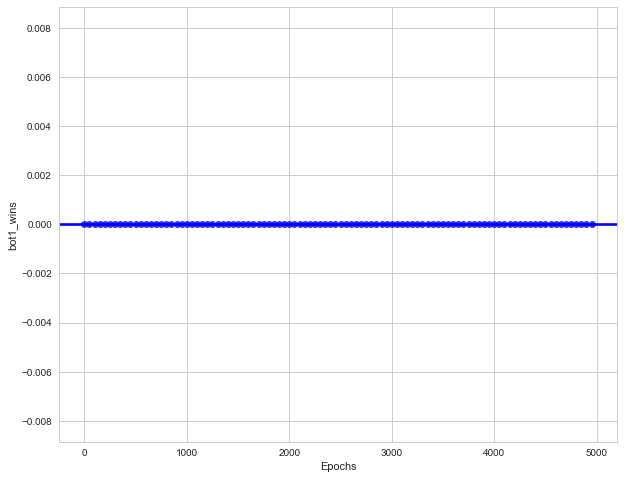

In [21]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(figsize=(10,8))
ax = sns.regplot(data=win_trace_50_samples.reset_index(), x='index', y='bot1', color='b')
ax.set(xlabel='Epochs', ylabel='bot1_wins')
plt.show()

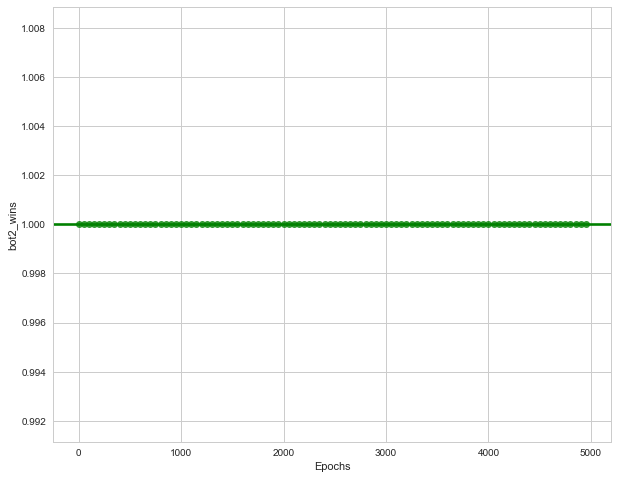

In [22]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(figsize=(10,8))
ax = sns.regplot(data=win_trace_50_samples.reset_index(), x='index', y='bot2', color='g')
ax.set(xlabel='Epochs', ylabel='bot2_wins')
plt.show()